# Global Green Energy Part 5: Advanced Clustering & Income Analysis 🎯

Moving into sophisticated machine learning territory, we apply PCA and multi-dimensional clustering to uncover hidden patterns in global energy systems. This analysis combines dimensionality reduction with income-based stratification to reveal how economic development shapes energy access and renewable adoption across different country profiles.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# load in data
raw_data = pd.read_csv('../day18/global_sustainable_energy_data.csv')

#display(raw_data.sample(4))
#raw_data.info()

# data looks good, let's visuailise it. 
df = raw_data.copy()

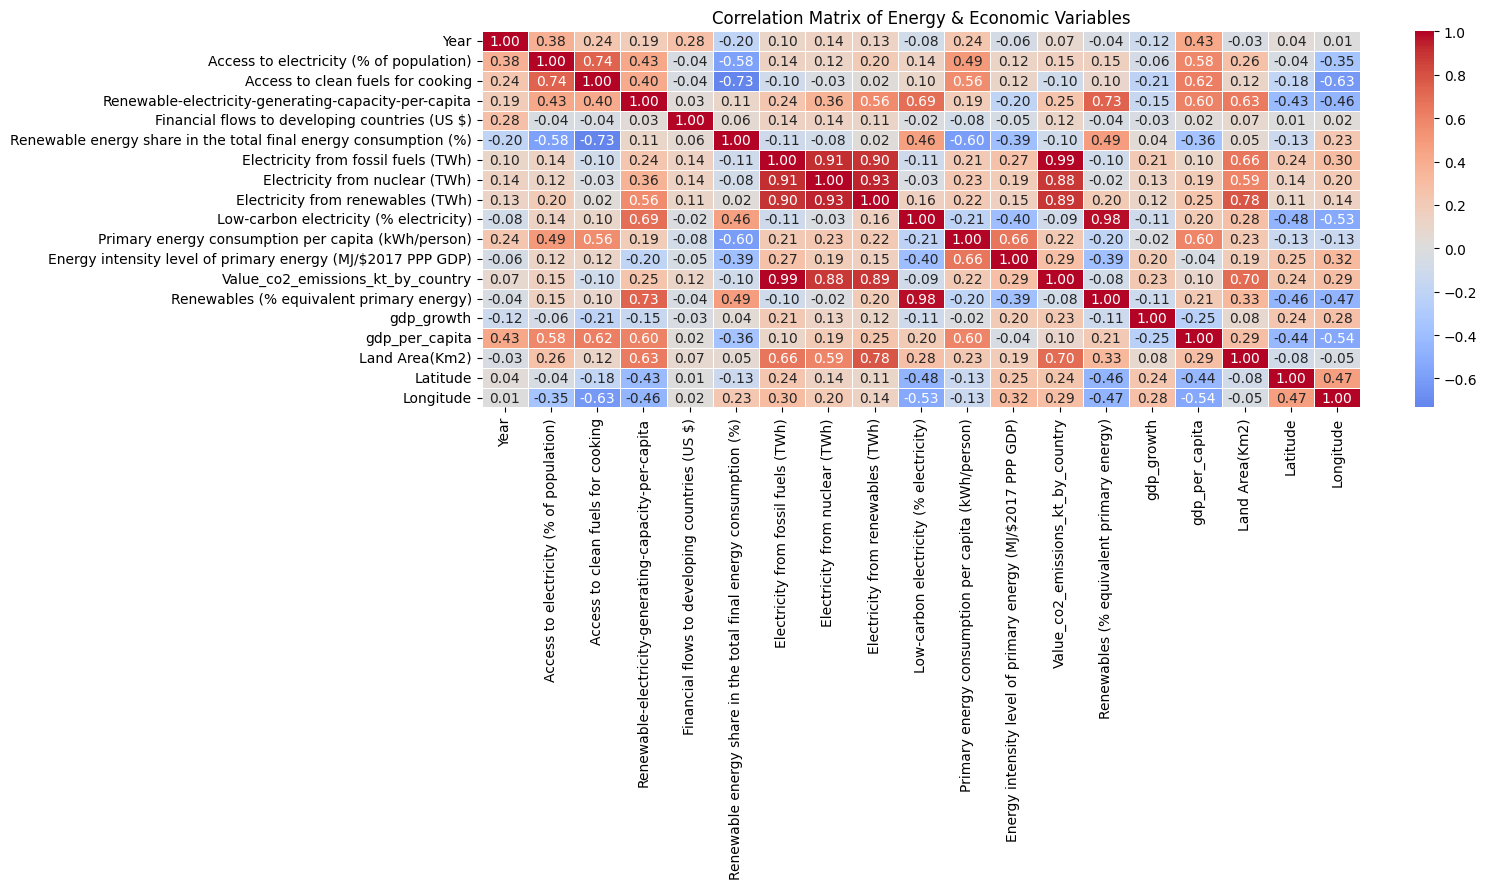

In [2]:
# Select only numeric columns
df_num = df.select_dtypes(include="number")

# Drop missing values (or fillna if needed)
df_corr = df_num.dropna()

# Correlation matrix
corr_matrix = df_corr.corr()

# Plot
plt.figure(figsize=(16, 9))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix of Energy & Economic Variables")
plt.tight_layout()
plt.show()

## System-Wide Correlations: The Foundation for Clustering

Before diving into advanced clustering, the correlation matrix establishes our analytical foundation:
- **Feature relationships** - understanding how energy variables correlate guides our selection of clustering features and helps interpret the resulting patterns
- **Dimensionality insights** - strong correlations suggest opportunities for dimensionality reduction, where multiple related variables can be compressed into fewer, more meaningful components

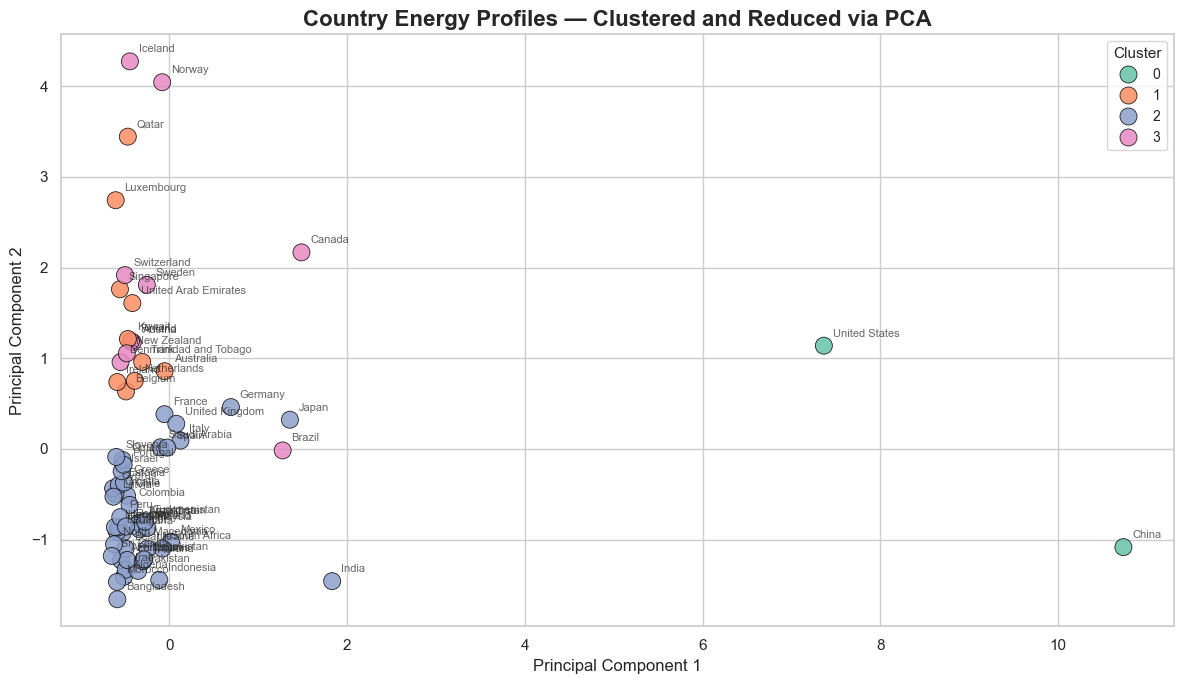

In [10]:
# 1. Group by country and average over years
df_avg = df.dropna(subset=[
    "Electricity from fossil fuels (TWh)",
    "Electricity from renewables (TWh)",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "Primary energy consumption per capita (kWh/person)",
    "Renewables (% equivalent primary energy)",
    "Value_co2_emissions_kt_by_country",
    "gdp_per_capita"
])
df_avg = df_avg.groupby("Entity").mean(numeric_only=True).reset_index()

# 2. Select features for clustering
features = [
    "Electricity from fossil fuels (TWh)",
    "Electricity from renewables (TWh)",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "Primary energy consumption per capita (kWh/person)",
    "Renewables (% equivalent primary energy)",
    "Value_co2_emissions_kt_by_country",
    "gdp_per_capita"
]
X = df_avg[features].copy()

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df_avg["Cluster"] = kmeans.fit_predict(X_scaled)

# 5. Dimensionality reduction for 2D plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_avg["PC1"] = X_pca[:, 0]
df_avg["PC2"] = X_pca[:, 1]

sns.set(style="whitegrid", context="notebook")
palette = sns.color_palette("Set2", n_colors=df_avg["Cluster"].nunique())

plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=df_avg,
    x="PC1", y="PC2",
    hue="Cluster", palette=palette,
    s=150, edgecolor="black", linewidth=0.6, alpha=0.85
)

# Add country labels (optional - toggle off if cluttered)
for _, row in df_avg.iterrows():
    plt.text(row["PC1"] + 0.1, row["PC2"] + 0.1, row["Entity"], fontsize=8, alpha=0.7)

# Titles and formatting
plt.title("Country Energy Profiles — Clustered and Reduced via PCA", fontsize=16, weight="bold")
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Cluster", loc="best", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


## PCA Clustering: Mapping Energy System Archetypes

The PCA scatter plot reveals the fundamental structure of global energy diversity:
- **Dimensional reduction** - seven complex energy variables are compressed into two principal components that capture the most important patterns of variation across countries
- **Energy archetypes** - the distinct clusters represent different "types" of energy systems, where countries with similar positions face comparable challenges and opportunities in their energy transitions

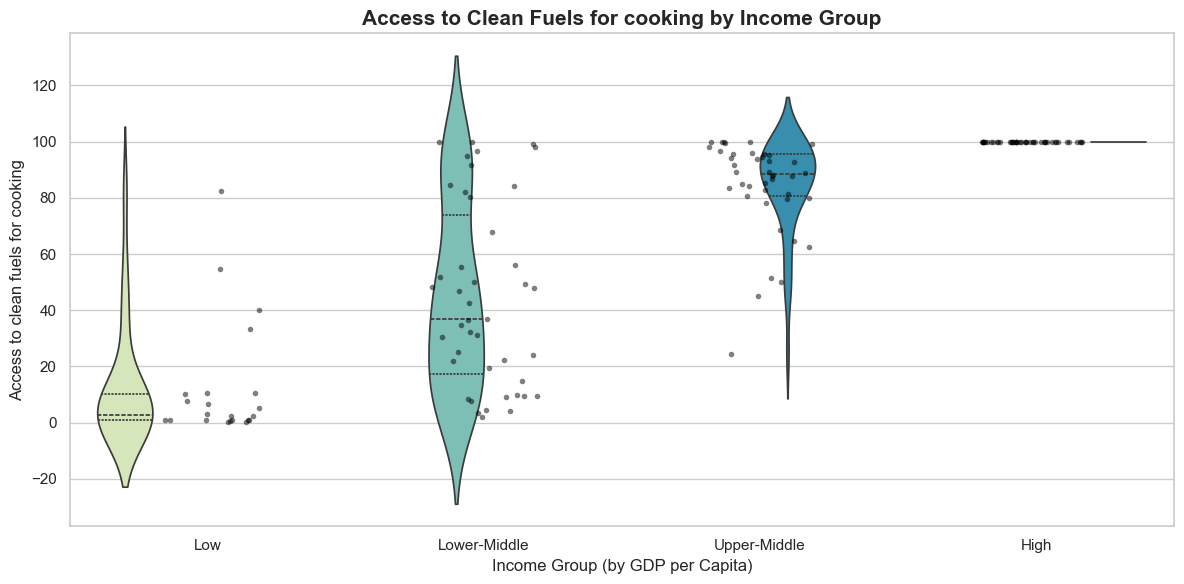

In [18]:
# Make a copy and drop missing rows
df_fuel = df[["Entity", "Year", "gdp_per_capita", "Access to clean fuels for cooking", "Electricity from renewables (TWh)"]].dropna()

# Bin by income brackets (World Bank-style)
df_fuel["Income Group"] = pd.cut(
    df_fuel["gdp_per_capita"],
    bins=[0, 1085, 4255, 13205, float("inf")],
    labels=["Low", "Lower-Middle", "Upper-Middle", "High"]
)

# Filter to a recent year for clarity
latest_year = df_fuel["Year"].max()
df_recent = df_fuel[df_fuel["Year"] == latest_year]

# Plot
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df_recent,
    x="Income Group", y="Access to clean fuels for cooking",
    inner="quartile", palette="YlGnBu", hue="Income Group", dodge=True
)
sns.stripplot(
    data=df_recent,
    x="Income Group", y="Access to clean fuels for cooking",
    color="black", alpha=0.5, jitter=0.2, size=4
)
plt.title("Access to Clean Fuels for cooking by Income Group", fontsize=15, weight="bold")
plt.ylabel("Access to clean fuels for cooking")
plt.xlabel("Income Group (by GDP per Capita)")
plt.tight_layout()
plt.show()


## Income Stratification: Development and Energy Access

The income-based analysis reveals stark inequalities in energy access across development levels:
- **Development gradient** - clean fuel access shows a clear progression from low to high-income countries, demonstrating how economic development directly enables energy infrastructure investments
- **Within-group variation** - even within income brackets, significant variation exists, suggesting that policy choices and resource endowments create different outcomes among countries at similar development levels

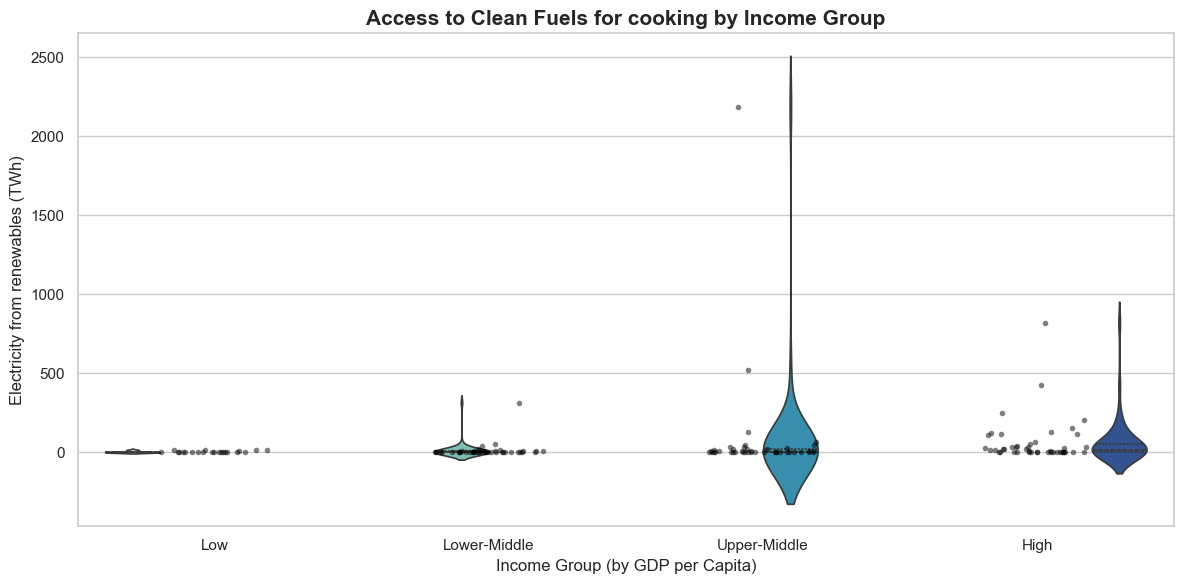

In [19]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df_recent,
    x="Income Group", y="Electricity from renewables (TWh)",
    inner="quartile", palette="YlGnBu", hue="Income Group", dodge=True
)
sns.stripplot(
    data=df_recent,
    x="Income Group", y="Electricity from renewables (TWh)",
    color="black", alpha=0.5, jitter=0.2, size=4
)
plt.title("Access to Clean Fuels for cooking by Income Group", fontsize=15, weight="bold")
plt.ylabel("Electricity from renewables (TWh)")
plt.xlabel("Income Group (by GDP per Capita)")
plt.tight_layout()
plt.show()


# Advanced Analytics Synthesis: Machine Learning Meets Energy Policy

## Methodological Evolution

This analysis represents the analytical frontier of energy system research, combining multiple sophisticated techniques:

### **PCA Dimensionality Reduction**
By compressing seven energy variables into two principal components, we reveal the fundamental axes along which countries vary - likely representing development level and energy mix orientation. This approach uncovers patterns invisible in simple correlation analysis.

### **Multi-dimensional Clustering**
K-means clustering on scaled, multi-dimensional energy data identifies natural groupings of countries with similar energy system characteristics, moving beyond obvious geographic or economic categories to reveal functional energy archetypes.

### **Income Stratification Analysis**
Combining income brackets with violin plots reveals both the central tendencies and full distributions of energy outcomes across development levels, highlighting both systematic patterns and exceptional cases.

## Key Policy Insights

### **Energy System Archetypes**
The PCA clustering suggests that countries fall into distinct energy system "types" based on their position in development-efficiency space. This implies that policy interventions should be tailored to archetype rather than applying universal solutions.

### **Development Paradoxes**
While income generally correlates with better energy access, the substantial variation within income groups reveals that development level doesn't determine energy outcomes - policy choices and resource management create significant differences among economic peers.

### **Renewable Transition Patterns**
The renewable electricity distributions show that clean energy adoption doesn't follow simple income patterns, suggesting that technological leapfrogging and targeted policy interventions can enable lower-income countries to achieve disproportionate renewable success.

## Strategic Implications

The combination of unsupervised machine learning with income-based stratification provides a powerful framework for:
- **Targeted policy design** based on energy system archetypes rather than crude geographic or income categories
- **Peer learning networks** connecting countries with similar energy profiles regardless of traditional groupings
- **Investment prioritization** focusing on high-impact interventions within specific archetype-income combinations

This analytical approach demonstrates how advanced data science techniques can illuminate actionable insights for accelerating global energy transitions.